<a target="_blank" href="https://colab.research.google.com/github/LuisAngelMendozaVelasco/Applied_Data_Science_with_Python_Specialization/blob/main/Applied_Plotting-Charting_and_Data_Representation_in_Python/Week4/Labs/Week4.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>

In [1]:
%%bash
# If running in Google Colab

# mkdir data
# wget https://raw.githubusercontent.com/LuisAngelMendozaVelasco/Applied_Data_Science_with_Python_Specialization/main/Applied_Plotting-Charting_and_Data_Representation_in_Python/Week4/Labs/data/iris.csv -P ./data

# Pandas Visualization

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib notebook

In [3]:
# see the pre-defined styles provided.
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [4]:
# use the 'seaborn-colorblind' style
plt.style.use('seaborn-v0_8-whitegrid')

### DataFrame.plot

In [5]:
np.random.seed(123)

df = pd.DataFrame({ 'A': np.random.randn(365).cumsum(0), 
                    'B': np.random.randn(365).cumsum(0) + 20,
                    'C': np.random.randn(365).cumsum(0) - 20}, 
                    index=pd.date_range('1/1/2017', periods=365))
df.head()

,A,B,C
2017-01-01,-1.085631,20.059291,-20.230904
2017-01-02,-0.088285,21.803332,-16.659325
2017-01-03,0.194693,20.835588,-17.055481
2017-01-04,-1.311601,21.255156,-17.093802
2017-01-05,-1.890202,21.462083,-19.518638


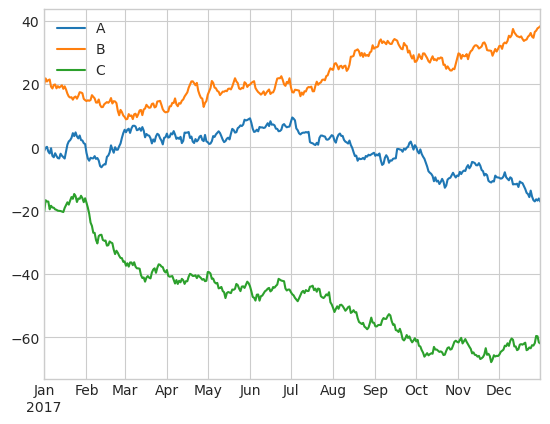

In [6]:
df.plot(); # add a semi-colon to the end of the plotting call to suppress unwanted output

We can select which plot we want to use by passing it into the 'kind' parameter.

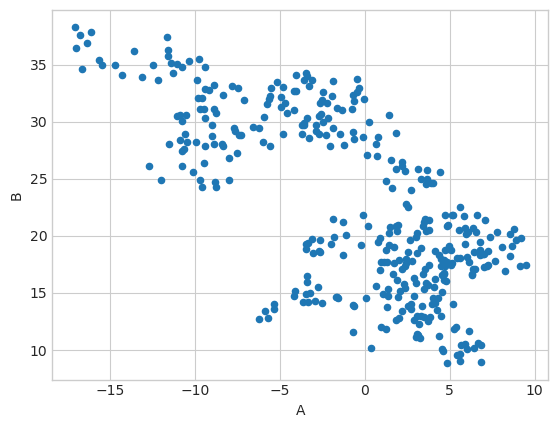

In [7]:
df.plot('A', 'B', kind='scatter');

You can also choose the plot kind by using the `DataFrame.plot.kind` methods instead of providing the `kind` keyword argument.

`kind`:
- `'line'`: line plot (default)
- `'bar'`: vertical bar plot
- `'barh'`: horizontal bar plot
- `'hist'`: histogram
- `'box'`: boxplot
- `'kde'`: Kernel Density Estimation plot
- `'density'`: same as 'kde'
- `'area'`: area plot
- `'pie'`: pie plot
- `'scatter'`: scatter plot
- `'hexbin'`: hexbin plot

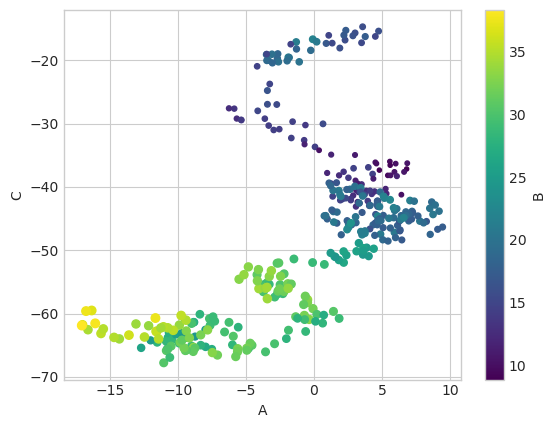

In [8]:
# create a scatter plot of columns 'A' and 'C', with changing color (c) and size (s) based on column 'B'
df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis');

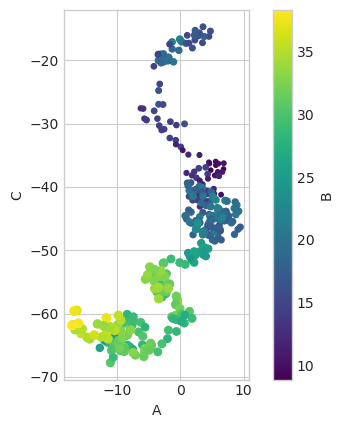

In [9]:
ax = df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')
ax.set_aspect('equal');

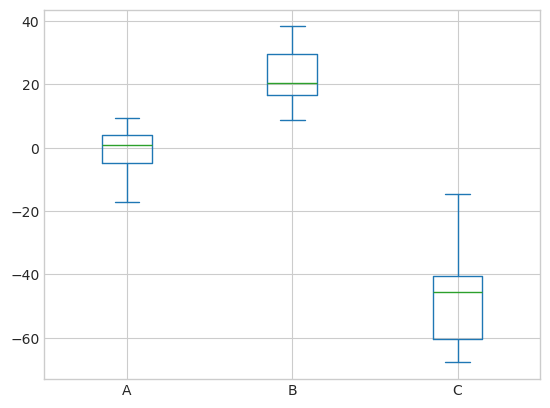

In [10]:
df.plot.box();

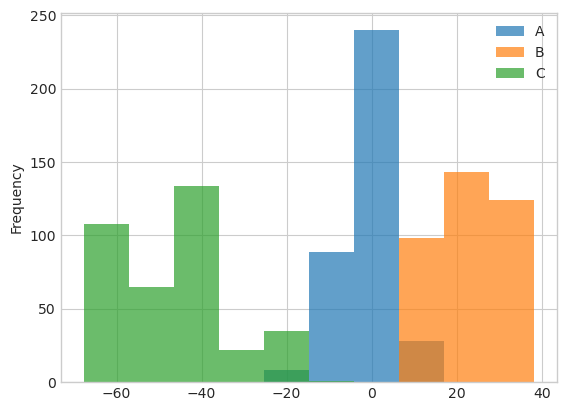

In [11]:
df.plot.hist(alpha=0.7);

[Kernel density estimation plots](https://en.wikipedia.org/wiki/Kernel_density_estimation) are useful for deriving a smooth continuous function from a given sample.

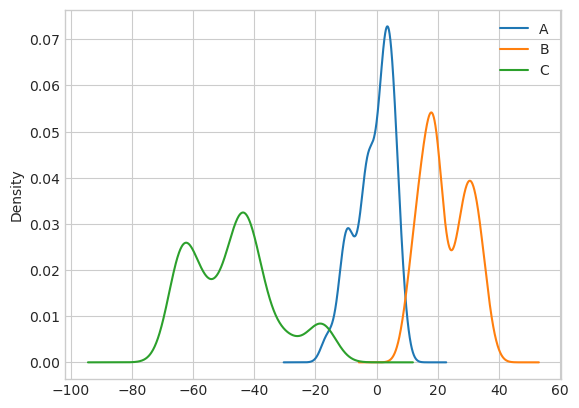

In [12]:
df.plot.kde();

### pandas.tools.plotting

[Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set)

In [13]:
iris = pd.read_csv('./data/iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


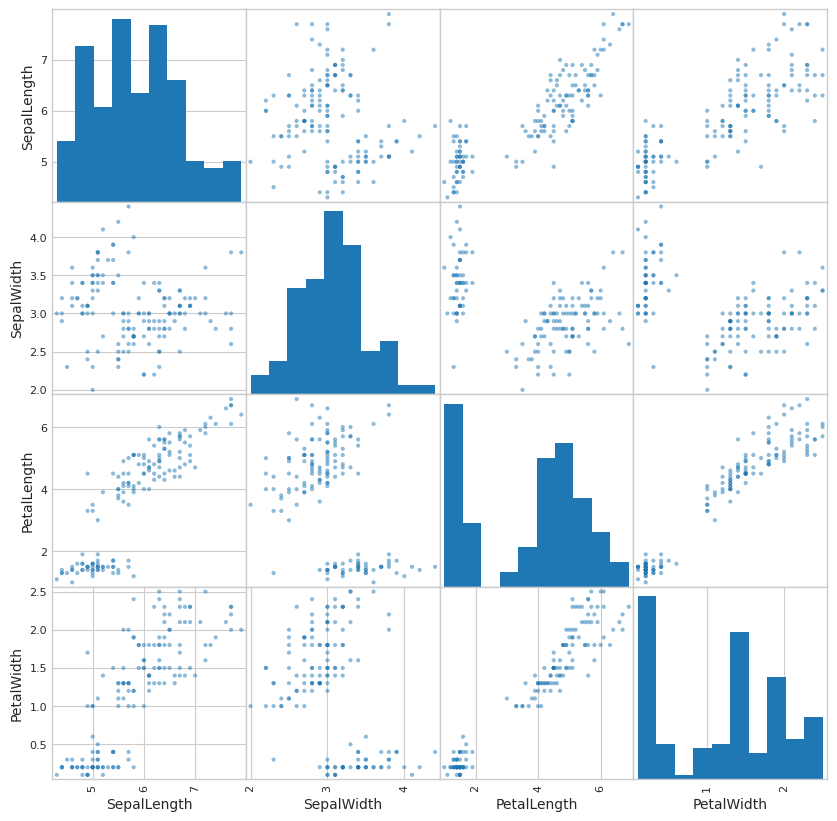

In [14]:
pd.plotting.scatter_matrix(iris, figsize=(10, 10));

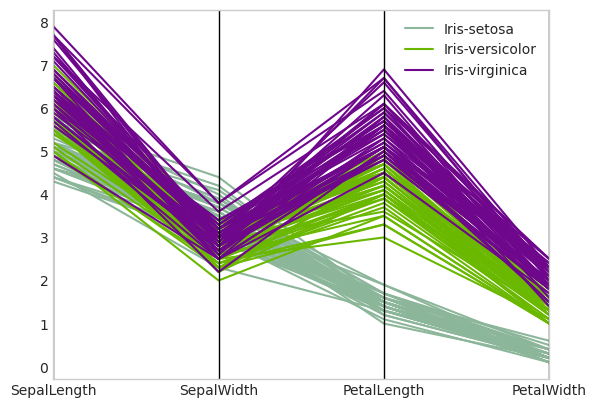

In [15]:
pd.plotting.parallel_coordinates(iris, 'Name');

# Seaborn

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib notebook

In [17]:
np.random.seed(1234)

v1 = pd.Series(np.random.normal(0, 10, 1000), name='v1')
v2 = pd.Series((2 * v1) + np.random.normal(60, 15, 1000), name='v2')

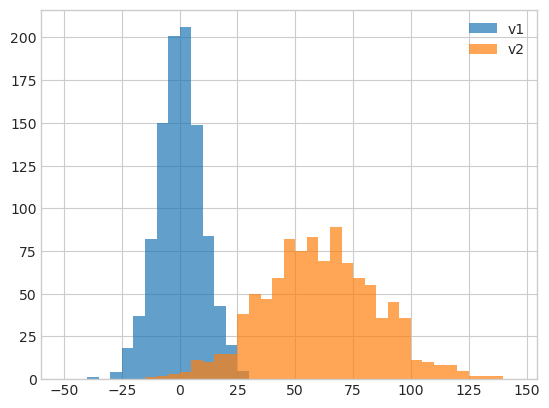

In [18]:
plt.figure()
plt.hist(v1, alpha=0.7, bins=np.arange(-50, 150, 5), label='v1')
plt.hist(v2, alpha=0.7, bins=np.arange(-50, 150, 5), label='v2')
plt.legend()
plt.show()

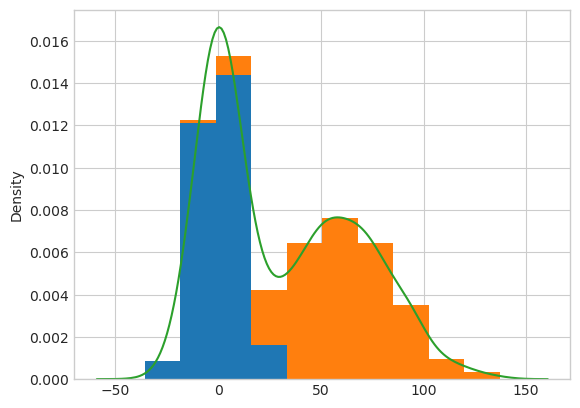

In [19]:
# plot a kernel density estimation over a stacked barchart
plt.figure()
plt.hist([v1, v2], histtype='barstacked', density=True)
v3 = np.concatenate((v1, v2))
pd.option_context('mode.use_inf_as_na', True)
sns.kdeplot(v3)
plt.show()

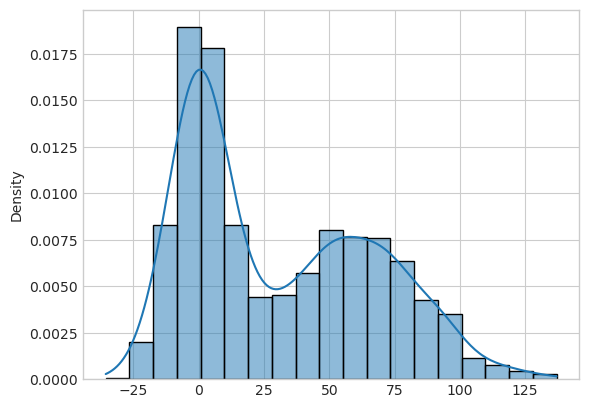

In [20]:
plt.figure()
# we can pass keyword arguments for each individual component of the plot
# sns.distplot(v3, hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'});
sns.histplot(v3, stat='density', kde=True)
plt.show()

<Figure size 640x480 with 0 Axes>

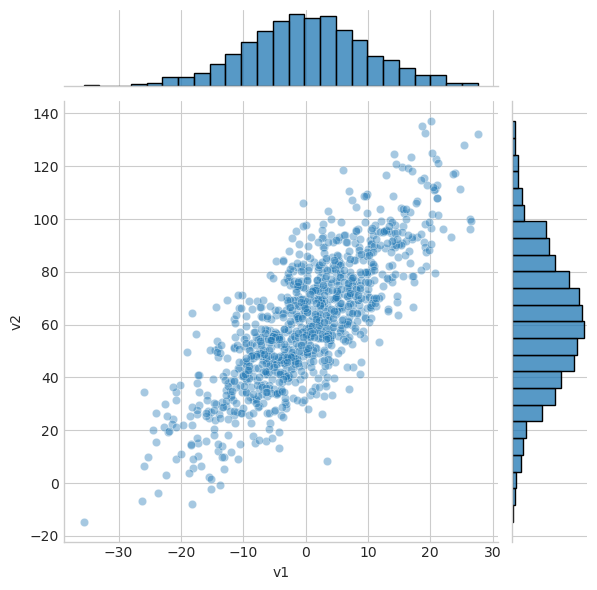

In [21]:
plt.figure()
sns.jointplot(x=v1, y=v2, alpha=0.4);
plt.show()

<Figure size 640x480 with 0 Axes>

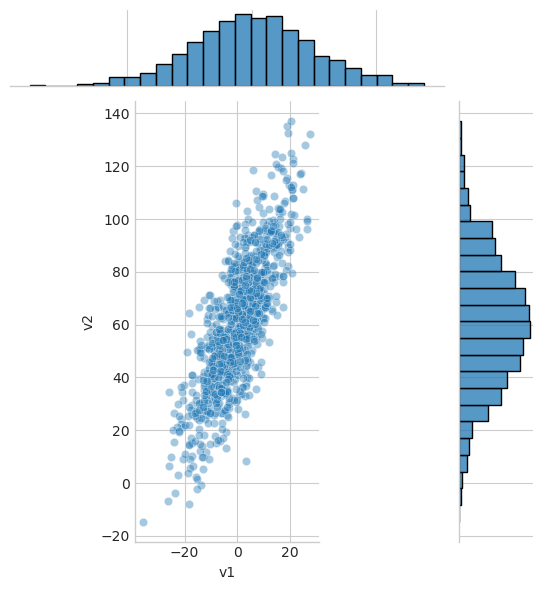

In [22]:
plt.figure()
grid = sns.jointplot(x=v1, y=v2, alpha=0.4)
grid.ax_joint.set_aspect('equal')
plt.show()

<Figure size 640x480 with 0 Axes>

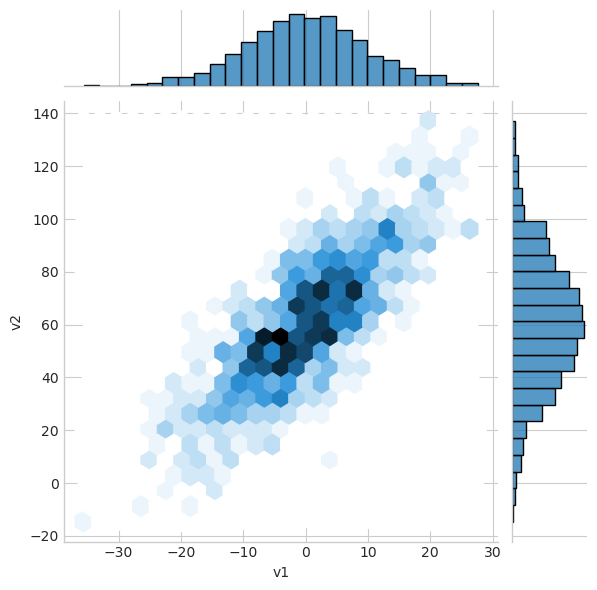

In [23]:
plt.figure()
sns.jointplot(x=v1, y=v2, kind='hex')
plt.show()

<Figure size 640x480 with 0 Axes>

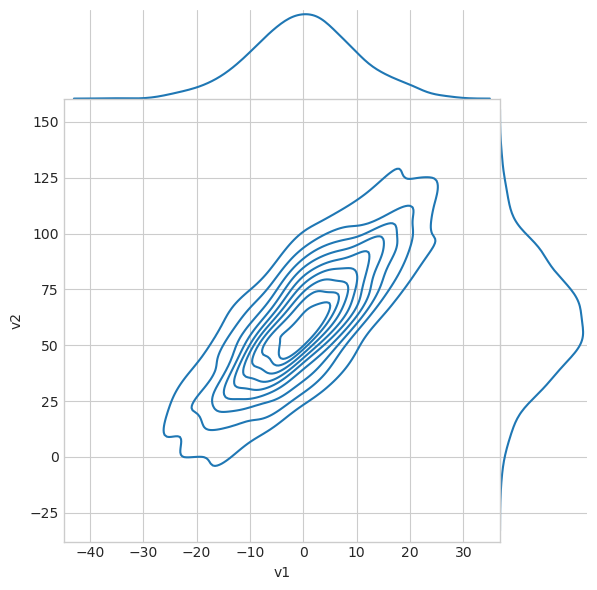

In [24]:
# set the seaborn style for all the following plots
sns.set_style('whitegrid')

plt.figure()
sns.jointplot(x=v1, y=v2, kind='kde', space=0)
plt.show()

In [25]:
iris = pd.read_csv('./data/iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<Figure size 640x480 with 0 Axes>

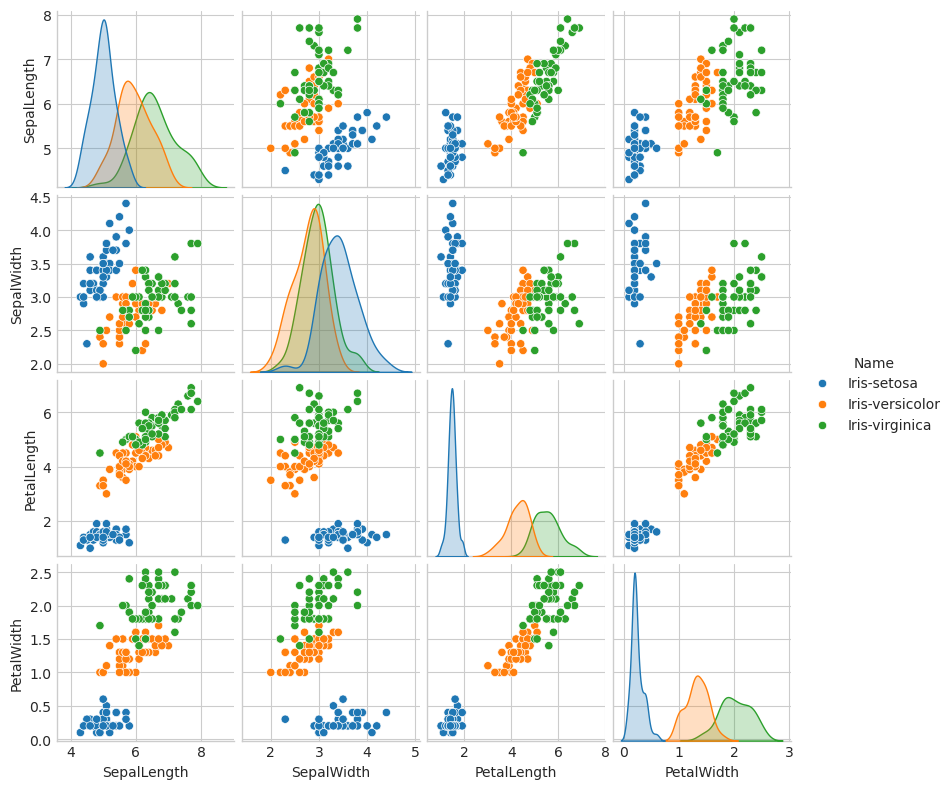

In [26]:
plt.figure()
sns.pairplot(iris, hue='Name', diag_kind='kde', height=2);
plt.show()

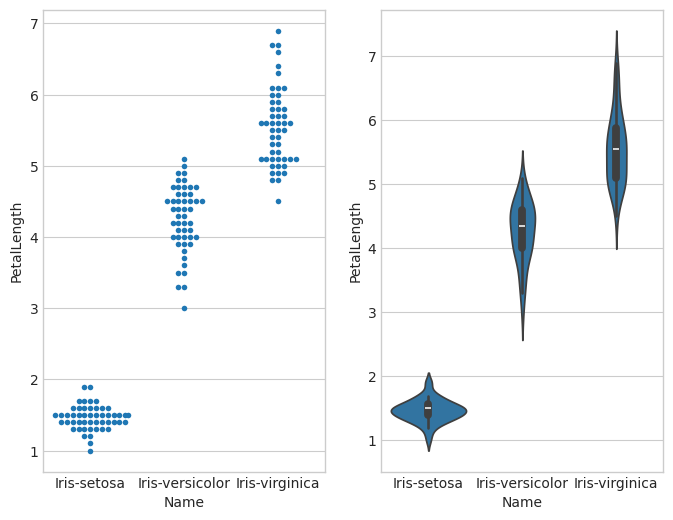

In [27]:
plt.figure(figsize=(8, 6))
plt.subplot(121)
sns.swarmplot(x='Name', y='PetalLength', data=iris, size=4)
plt.subplot(122)
sns.violinplot(x='Name', y='PetalLength', data=iris)
plt.show()